In [12]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.drop("Gender", axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.isna().sum()

Height    0
Weight    0
dtype: int64

Text(0, 0.5, 'Height')

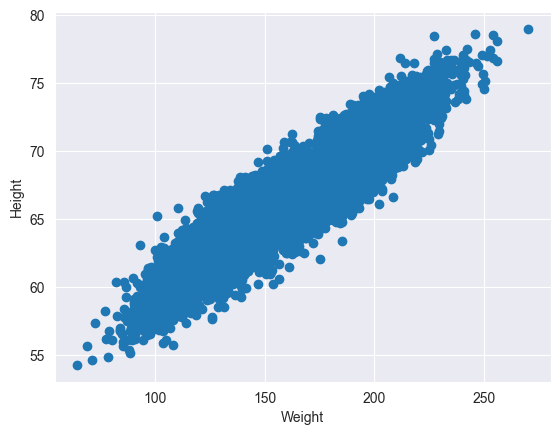

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


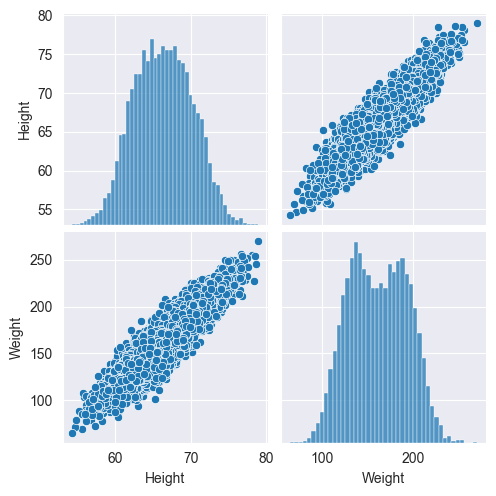

In [8]:
sns.pairplot(df)

In [9]:
X = df[["Weight"]]
y = df["Height"]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [3.5520765]
Intercept: 66.34834766149207


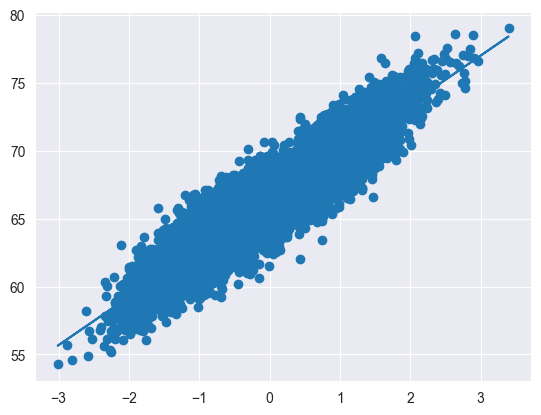

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [17]:
y_pred = regression.predict(X_test)

In [ ]:
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))

In [19]:
r2 = r2_score(y_test, y_pred)
n = len(y_train)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R2 Score:",r2)
print("Adjusted R2 Score:",adjusted_r2)

R2 Score: 0.857428881104187
Adjusted R2 Score: 0.8574098665511201


In [20]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]


In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Fri, 15 Nov 2024   Prob (F-statistic):                    3.63e-06
Time:                        11:57:33   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.5521      0.766      4.635      0.000       2.050       5.054
==============================================================================
Omnibus:                        3.836   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.869
Skew:                          -0.053   Prob(JB):                        0.144
Kurtosis:                       2.968   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
regression.predict(scaler.transform([[172]]))

array([67.54295773])